**ML BATCH 1**

**Assignment :**

to study and implement Ensemble Learning Algorithms and Comparative analysis

**Research Paper :**
Machine Learning Approaches for Classification and Diameter Prediction of Asteroids.



January 2023

DOI: 10.1007/978-981-19-7528-8_4

In book: Proceedings of International Conference on Information and Communication Technology for Development

Lab: Mir Sakhawat Hossain's Lab

Mir Sakhawat HossainMir Sakhawat HossainMd. Akib Zabed

from Research Gate

**Name :**

Omkar Awari 202101070094

Girish Amrutkar 202101070103

Piyush Girase 202101070111

## **1.Drive Mount**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2.Research Paper**

https://drive.google.com/file/d/1-yg1o9KTrMjjUnMeiLj9a4FZK9K8xH7I/view?usp=sharing



The research paper focuses on utilizing machine learning approaches for the classification and diameter prediction of asteroids, which has become crucial due to the increasing complexity of data in astronomy.

 By employing various machine learning algorithms like **kNN, Logistic Regression, and XGBoost for classification, and Linear Regression, Decision Trees, and Neural Networks** for diameter prediction, the authors achieved a high accuracy rate of **99.99%**

  The document discusses the dataset used, preprocessing steps, feature analysis techniques, and reviews related works in the field. The methodology outlined includes detailed steps for classification and diameter prediction models.
  
   Key contributions include feature analysis, efficient asteroid classification, and diameter prediction using machine learning algorithms.

The paper also reviews previous works in the field of astronomy and asteroid classification, highlighting the lack of a diameter prediction model for asteroids.

The authors propose a model to classify 13 asteroid groups and predict asteroid diameters efficiently using machine learning regression algorithms.

The results show that the **XGBoost model outperformed other machine learning regression models in accuracy and performance for asteroid classification.**

Evaluation metrics such as mean squared error, mean absolute error, and root mean square error were used for diameter prediction models, showcasing the effectiveness of the applied models.

In conclusion, the paper provides a comprehensive analysis of the methodology, results, and future research directions in the field of asteroid classification and diameter prediction using machine learning approaches .

## **3.Reading Dataset**

NASA JPL Asteroid Dataset

  collected this Dataset from kaggle  which is officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA.
  
   In this Dataset all kinds of Data related to Asteroid is included.
   
  This Dataset is publicly available in their website.

  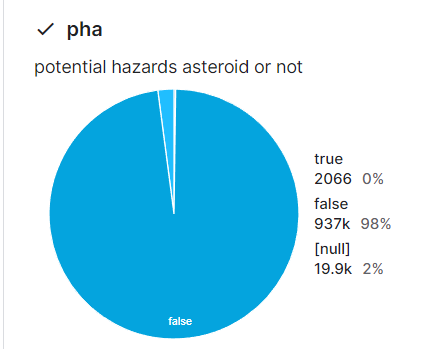

  

unique values in the Dataset : 958524

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DataSets/asteroid.csv")
df.head()

<ipython-input-3-e50590ac38c8>:5: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/DataSets/asteroid.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
df.shape

(958524, 45)

In [ ]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
df.isnull().sum() / len(df) * 100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

## **4.Data Cleaning**

In [ ]:
df = df.drop(['name', 'prefix'], axis=1)

In [ ]:
df[df['pha'] == 'Y'].isnull().sum()

id                   0
spkid                0
full_name            0
pdes                 0
neo                  0
pha                  0
H                    0
diameter          1845
albedo            1866
diameter_sigma    1877
orbit_id             0
epoch                0
epoch_mjd            0
epoch_cal            0
equinox              0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
tp_cal               0
per                  0
per_y                0
moid                 0
moid_ld              0
sigma_e              0
sigma_a              0
sigma_q              0
sigma_i              0
sigma_om             0
sigma_w              0
sigma_ma             0
sigma_ad             0
sigma_n              0
sigma_tp             0
sigma_per            0
class                0
rms                  0
dtype: int6

In [ ]:
df = df.dropna()

In [ ]:
df

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,939.400,0.0900,0.200,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,545.000,0.1010,18.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,525.400,0.4228,0.200,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,bK16N07B,3755231,(2016 NB7),2016 NB7,N,N,16.20,3.793,0.0210,1.375,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,bK16N24W,3755298,(2016 NW24),2016 NW24,N,N,17.40,2.696,0.0610,0.701,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,bK16P66B,3757444,(2016 PB66),2016 PB66,N,N,17.20,3.271,0.0720,1.074,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,bK16TB9F,54000016,(2016 TF119),2016 TF119,N,N,16.00,3.009,0.0780,0.981,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


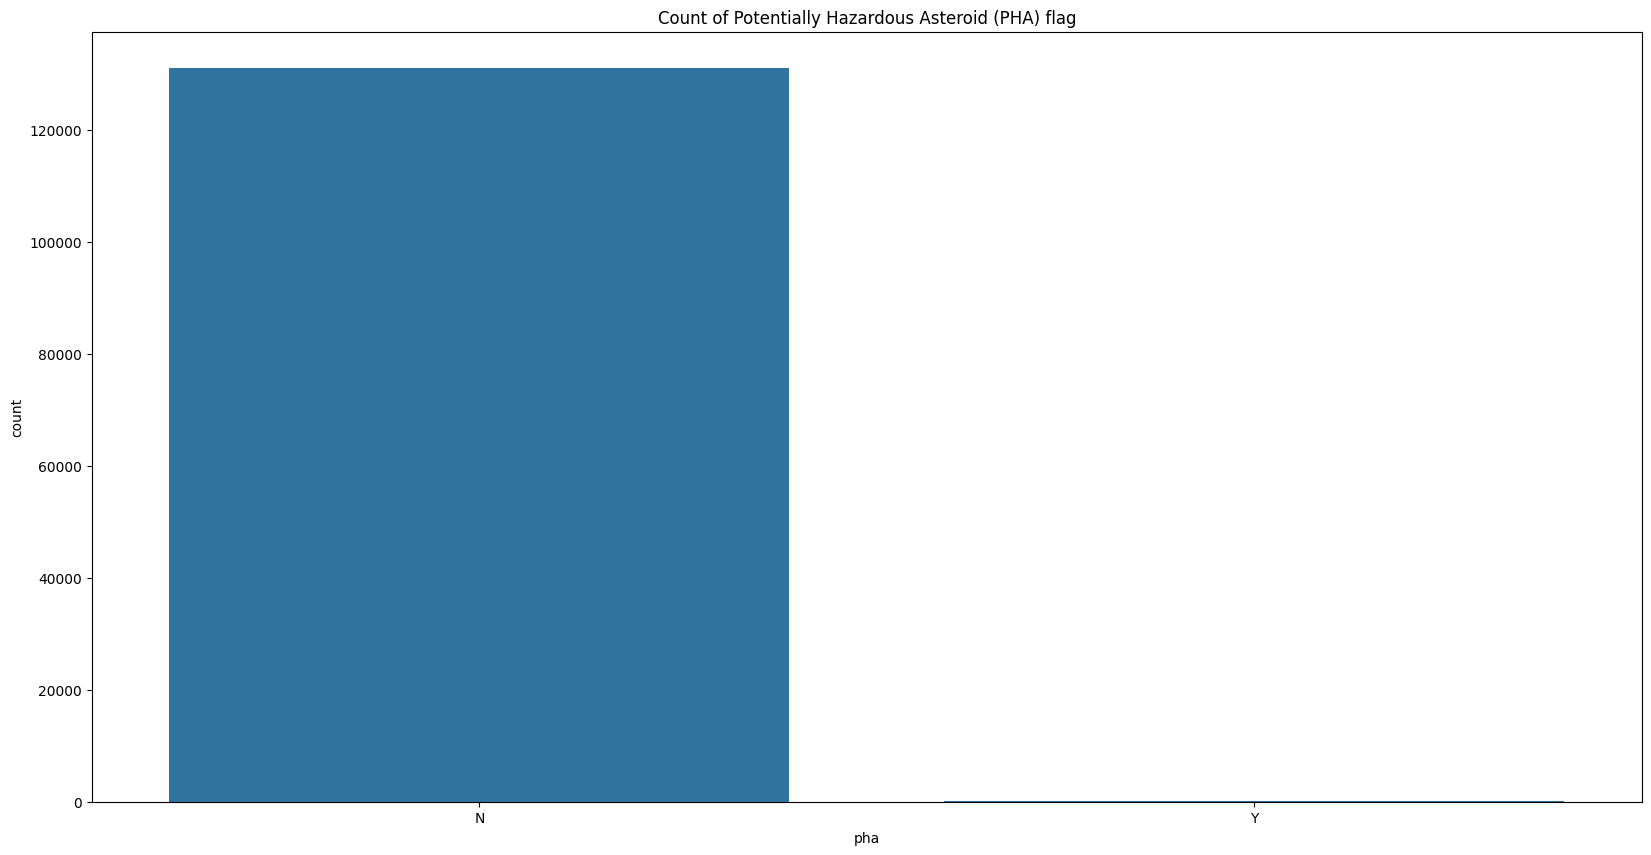

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=df, x='pha');

In [ ]:
len(df[df['pha'] == 'N'])

130961

In [ ]:
len(df[df['pha'] == 'Y'])

181

In [ ]:
len(df[df['pha'] == 'Y'])/ len(df[df['pha'] == 'N']) * 100

0.13820908514748667

In [ ]:
df['equinox'].unique()

array(['J2000'], dtype=object)

we will drop following columns

id

spkid

orbit_id

full_name

equinox

In [ ]:
df = df.drop(['id', 'spkid','full_name', 'equinox','orbit_id','pdes'], axis=1)

In [ ]:
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,N,N,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,N,N,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,N,N,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,N,N,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


## **5.Heatmap**

In [ ]:
df['class'].unique()


array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [ ]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

<ipython-input-22-9f56b6948bdb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=round(df.corr(),2), annot=True)


<Axes: >

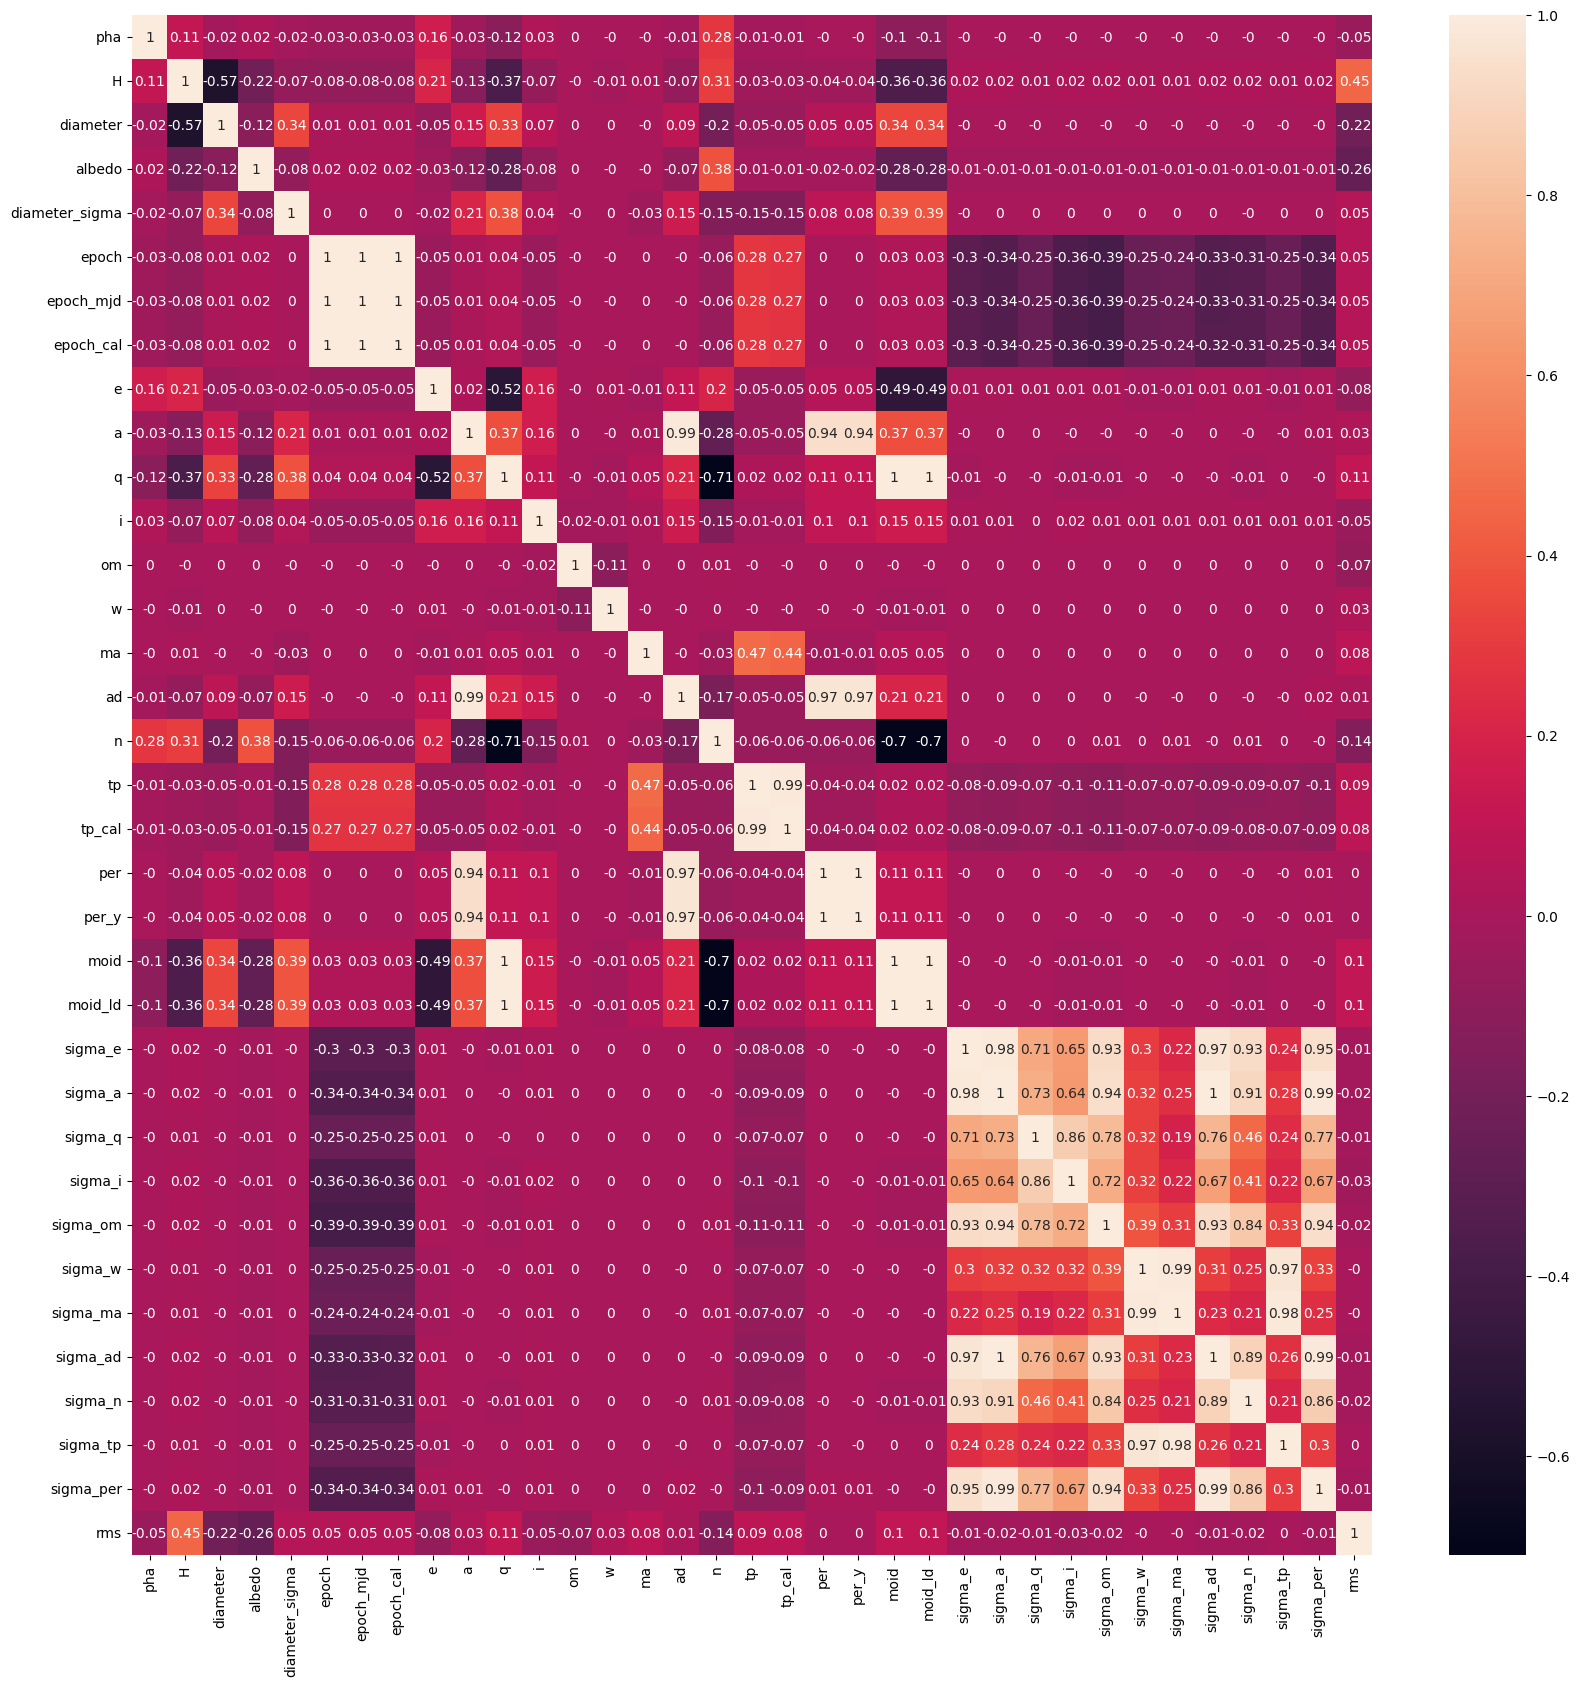

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=round(df.corr(),2), annot=True)

## **6.Encoding**

In [ ]:
df= pd.get_dummies(df)
df

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,...,0,0,0,0,0,1,0,0,0,0
1,0,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,...,0,0,0,0,0,1,0,0,0,0
2,0,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,...,0,0,0,0,0,1,0,0,0,0
3,0,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,...,0,0,0,0,0,1,0,0,0,0
4,0,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,0,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,3.169936,...,0,0,0,0,0,1,0,0,0,0
891841,0,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,2.550597,...,0,0,0,0,0,1,0,0,0,0
894103,0,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,3.050244,...,0,0,0,0,0,1,0,0,0,0
901055,0,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,3.191395,...,0,0,0,0,0,1,0,0,0,0


## **7.Splitting the Dataset**

In [ ]:
X = df.drop('pha', axis=1)
y = df['pha']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape


(91799, 47)

In [ ]:
X_test.shape


(39343, 47)

In [ ]:
y_train.shape


(91799,)

In [ ]:
y_test.shape

(39343,)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **8.Models Training along with time and score**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


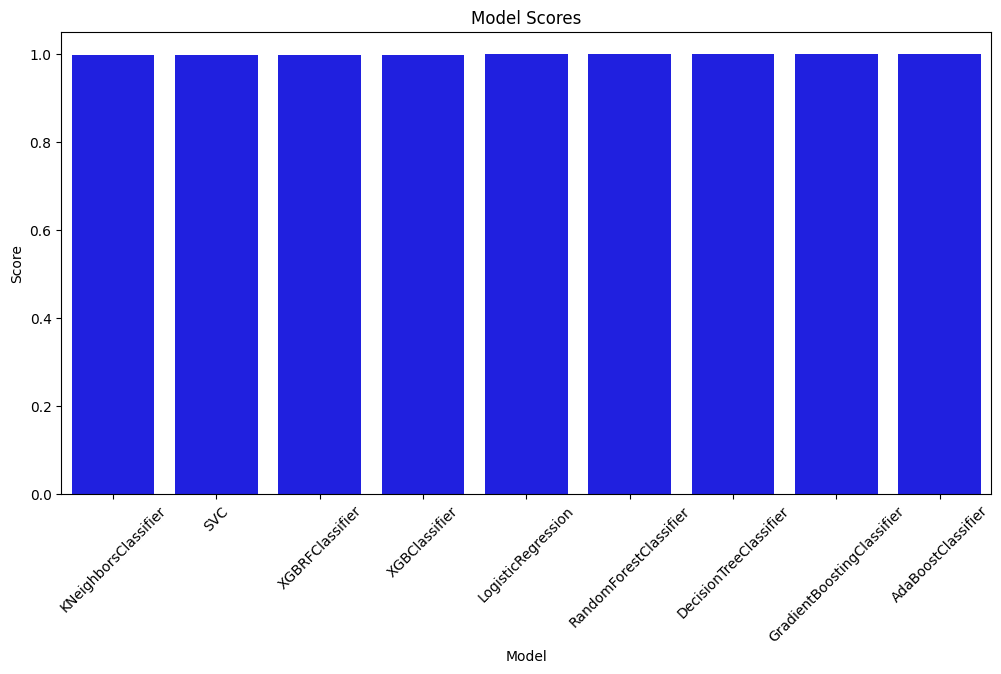

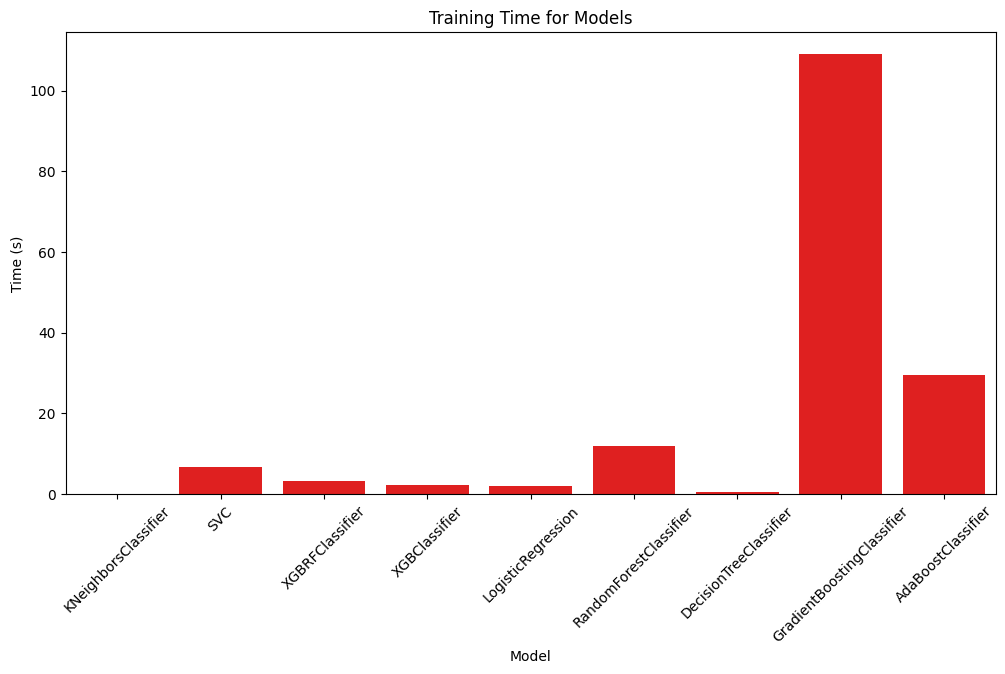

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import time

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}
    model_times = {}

    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        model_times[name] = end_time - start_time
        model_scores[name] = model.score(X_test, y_test)

    model_scores_df = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores_df = model_scores_df.sort_values('Score')

    model_times_df = pd.DataFrame(model_times, index=['Time (s)']).transpose()
    model_times_df = model_times_df.reindex(model_scores_df.index)  # Reindex to match the order of model_scores_df

    # Plotting scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_scores_df.index, y=model_scores_df['Score'], color='blue')
    plt.title('Model Scores')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting training times
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_times_df.index, y=model_times_df['Time (s)'], color='red')
    plt.title('Training Time for Models')
    plt.xlabel('Model')
    plt.ylabel('Time (s)')
    plt.xticks(rotation=45)
    plt.show()

    # Combine scores and times into one DataFrame
    combined_df = pd.concat([model_scores_df, model_times_df], axis=1)

    return combined_df

models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'XGBRFClassifier': XGBRFClassifier()
}

baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)


## **9.Ensemble Learning Model Evaluation**

### **Adaboost**

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels 'y_true' and predicted labels 'y_pred'
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       1.00      1.00      1.00        58

    accuracy                           1.00     39343
   macro avg       1.00      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

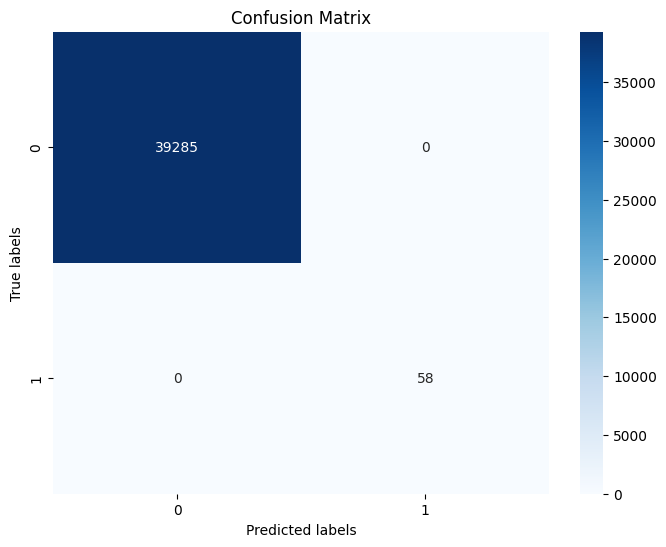

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have true labels 'y_test' and predicted labels 'y_preds'
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Auc-Roc Curve

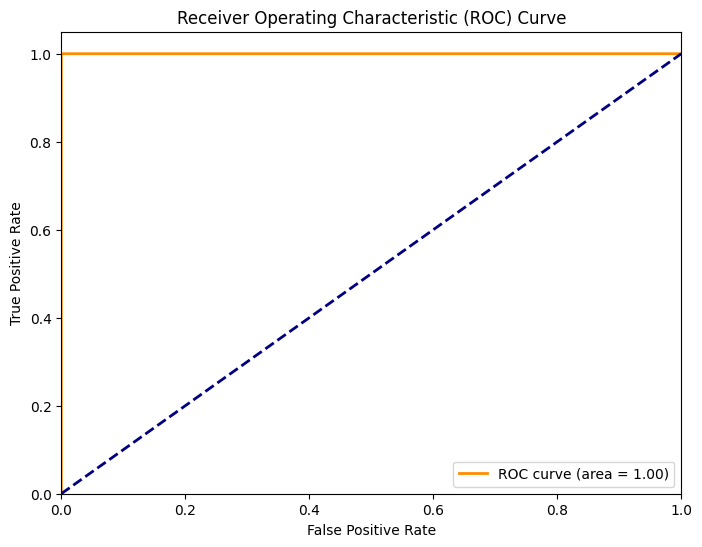

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the AdaBoostClassifier model named 'model' and the test features 'X_test'
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


calculate evalution metrices using cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

array([1.        , 1.        , 1.        , 0.99984749, 0.99763611])

In [ ]:
cv_acc = cv_acc.mean()

In [ ]:
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

array([1.        , 1.        , 1.        , 1.        , 0.36734694])

In [ ]:
cv_precision.mean()

0.8734693877551021

In [ ]:
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

array([1.        , 1.        , 1.        , 0.88888889, 1.        ])

In [ ]:
cv_recall.mean()

0.9777777777777779

In [ ]:
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

array([1.        , 1.        , 1.        , 0.94117647, 0.53731343])

In [ ]:
cv_f1.mean()

0.8956979806848112

Text(0.5, 1.0, 'CV scores')

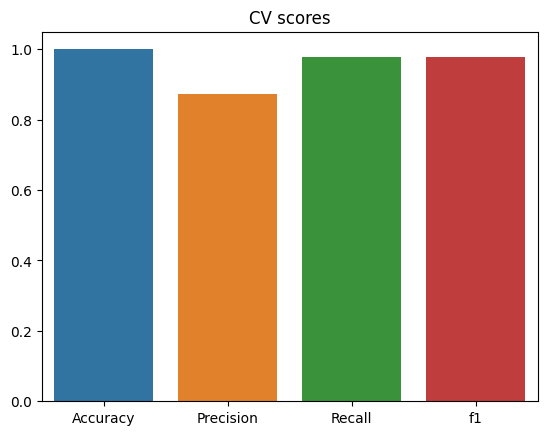

In [ ]:
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [ ]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.999497,0.873469,0.977778,0.977778


Feature Importance

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)

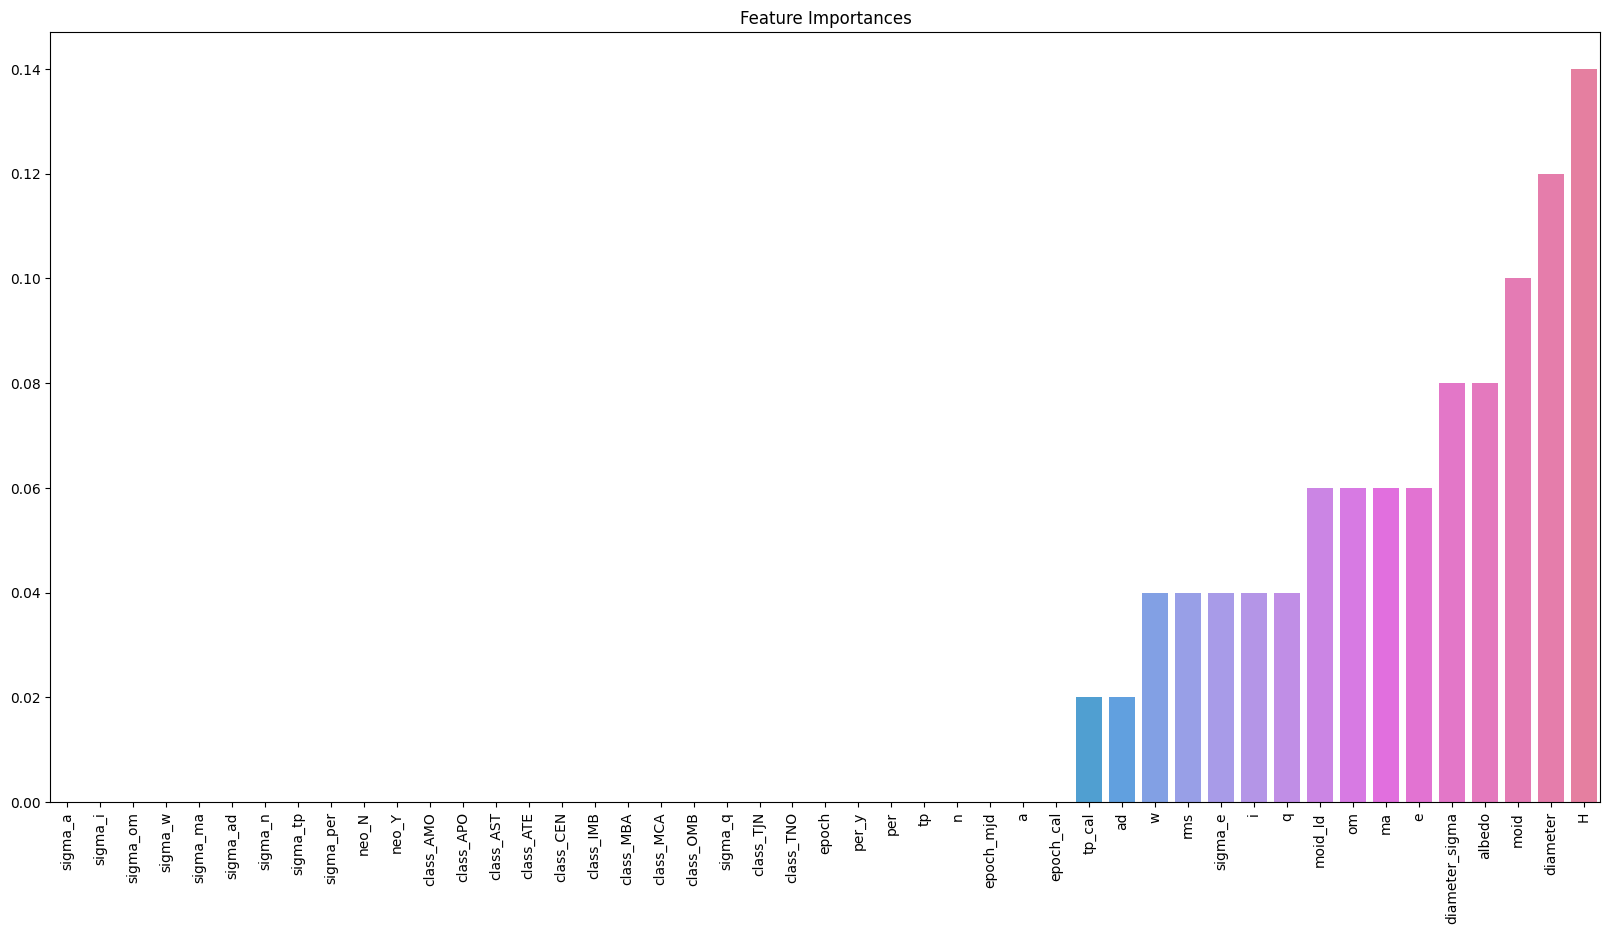

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

### **XGBClassifier**

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.60      0.57      0.58        58

    accuracy                           1.00     39343
   macro avg       0.80      0.78      0.79     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

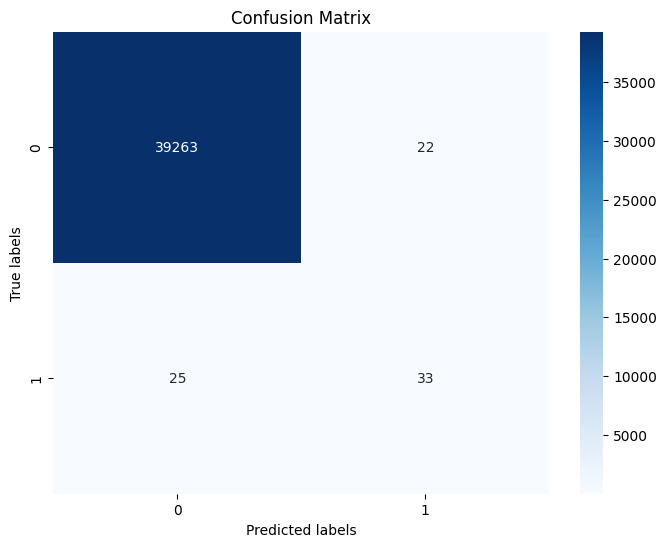

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Roc Curve

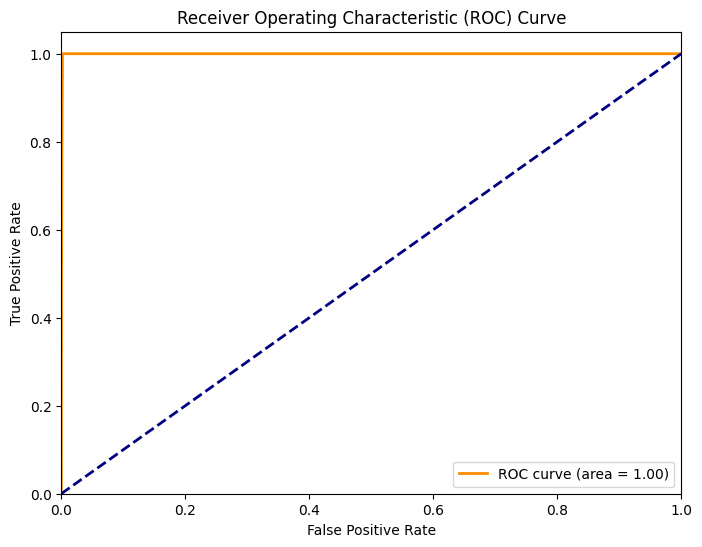

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the XGBClassifier model named 'model' and the test features 'X_test'
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Calculate Evaluation metrics using Cross Validation

Text(0.5, 1.0, 'CV scores')

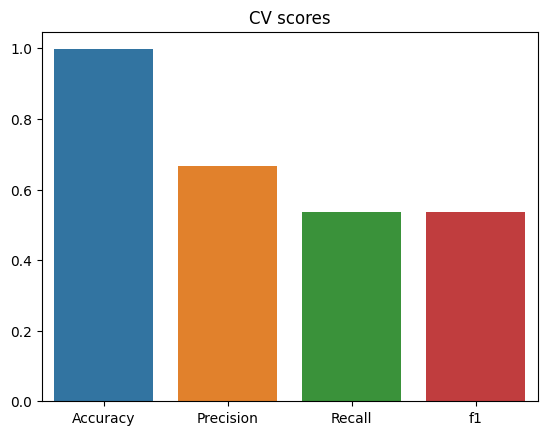

In [ ]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
cv_acc
cv_acc = cv_acc.mean()
cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
cv_precision
cv_precision.mean()
cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
cv_recall
cv_recall.mean()
cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
cv_f1
cv_f1.mean()
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [ ]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.997331,0.667608,0.535886,0.535886


Feature Importance

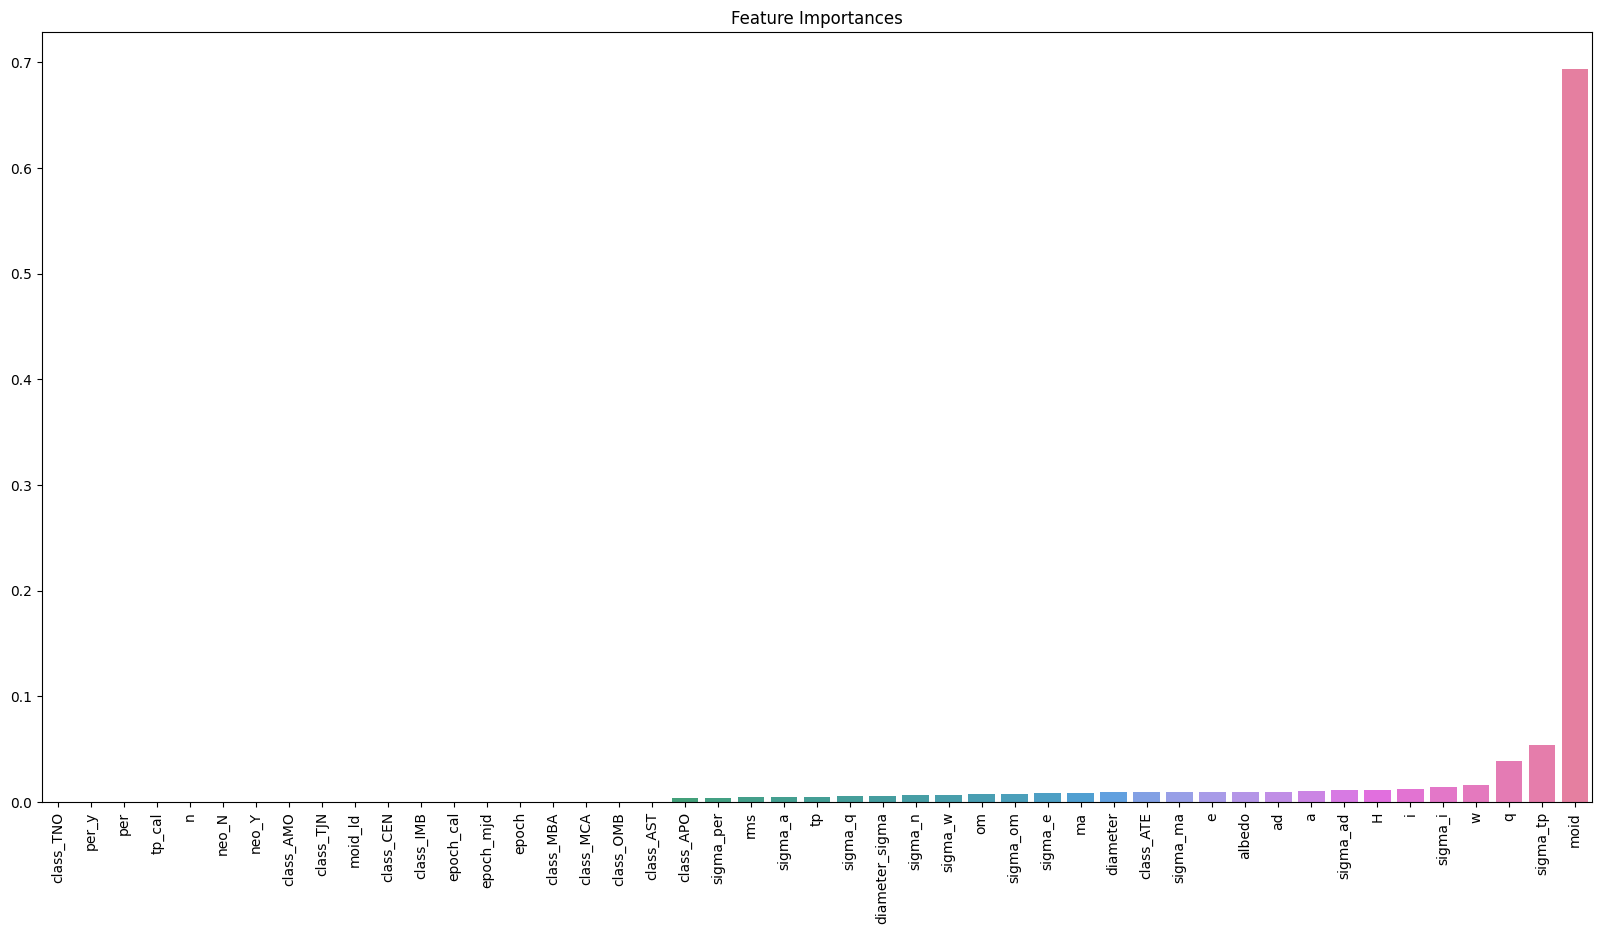

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

### **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the GradientBoostingClassifier model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions
y_preds = model.predict(X_test)
y_preds_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class


Classification Report

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       0.98      0.98      0.98        58

    accuracy                           1.00     39343
   macro avg       0.99      0.99      0.99     39343
weighted avg       1.00      1.00      1.00     39343



Confusion Matrix

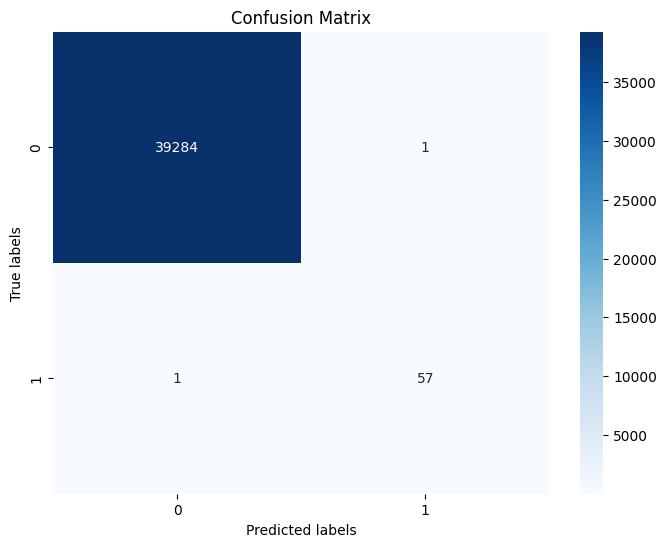

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Roc Curve

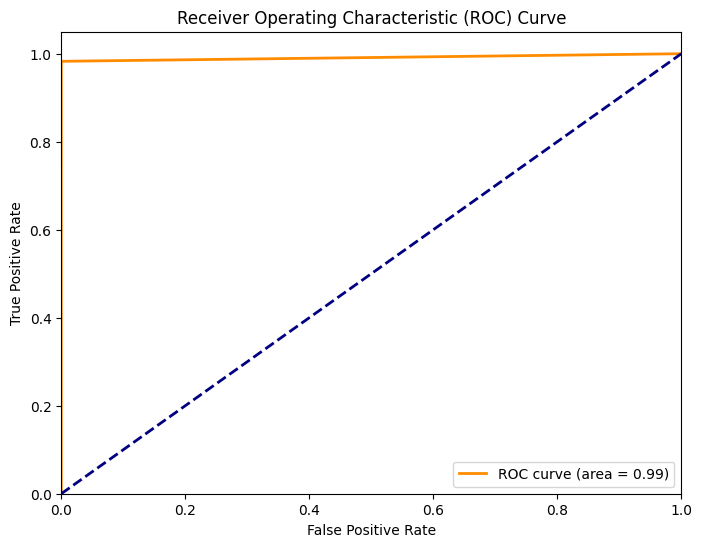

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Feature Importance

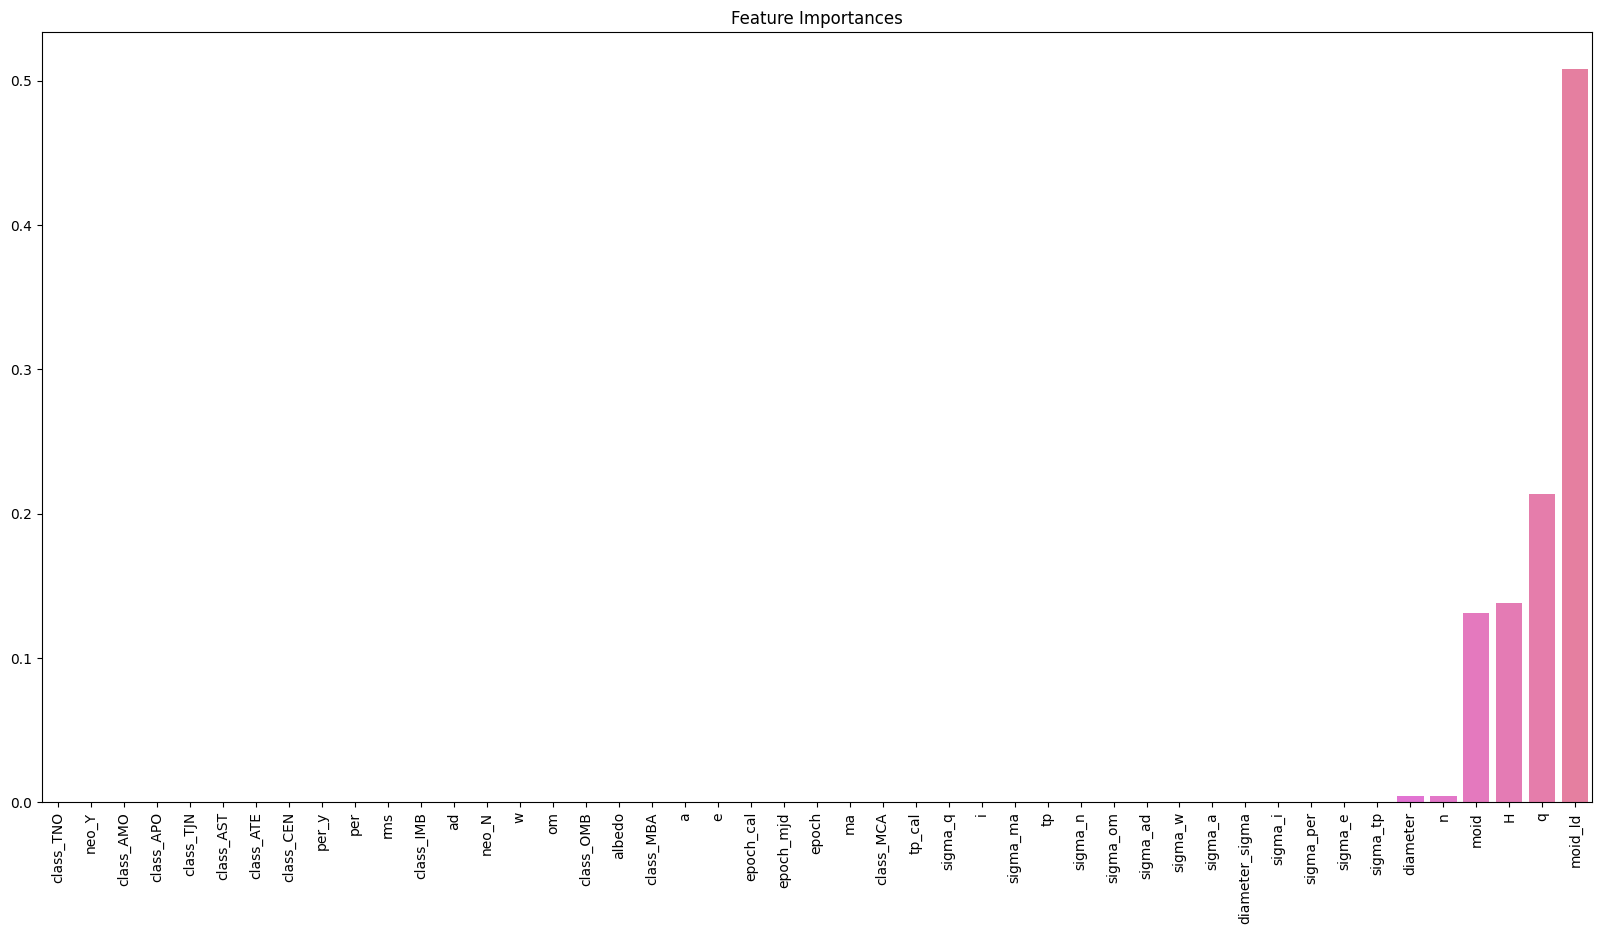

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

## **10.Conclusion**

Different models from ensemble learning that are implemented above gives us different feature importances in each model.
Similarly the Evaluation Metrices for the models are changed once we performed cross validation technique.
We also found that training time is highest for the ensemble learning models.